<h1>Tâche 8 : Bandes électroniques</h1>
<p>Dans ce Jupyter Notebook, nous allons télécharger  la structure de bandes électroniques du matériau ScNiSb <code>mp-3432</code>. </p>
<p>Ensuite, nous allons analyser la structure de bande : </p>
<ul>
  <li>
    déterminer la bande interdite
    
  </li>
  <li>
    trouver la direction dans laquelle la dernière bande de valence présente le plus et le moins de dispersion
  </li>
  <li>
    trouver la direction dans laquelle la première bande de conduction présente le plus et le moins de dispersion
  </li>
  <li>
      calculer la masse effective au sommet de la dernière bande de valence
  </li>
  <li>
      calculer la masse effective à la base de la première bande de conduction
  </li>
    
</ul>

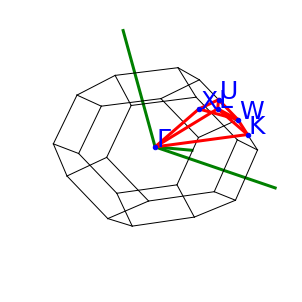

In [4]:
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator

my_user_api_key = "RoIT1CX7DvB59O2S" # Materials Project legacy API key
m = MPRester(api_key=my_user_api_key)
structure = m.get_structure_by_material_id("mp-3432")

bands = m.get_bandstructure_by_material_id("mp-3432")


BSPlot = BSPlotter(bands)

BSPlot.plot_brillouin()

<h2> Bande interdite </h2>
<p>La bande interdite est l'intervalle ne possédant pas de niveaux d'énergies électroniques.</p>
<p>La largeur de la bande interdite est de 0.2679 eV, en passant du point $\Gamma$ au point X.</p>
    
<p>On remarque que la bande interdite est indirecte. En effet, avec le graphique affiché on remarque que le pic de la bande de valence n'est pas aligné avec le minmum de la bande de conduction.</p>

{'direct': False, 'energy': 0.2679, 'transition': '\\Gamma-X'}


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

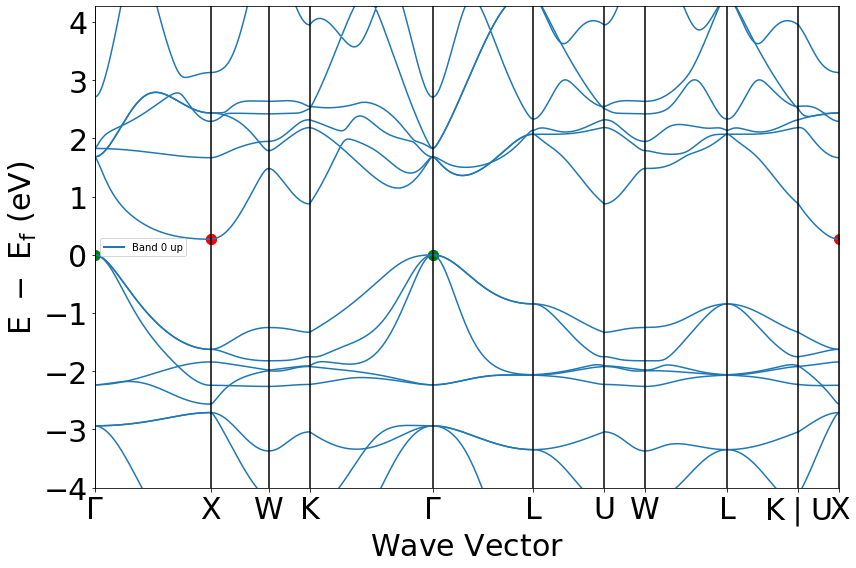

In [6]:
print(bands.get_band_gap())
BSPlot.get_plot(vbm_cbm_marker=True)

<h2> Dispersion </h2>

In [31]:

#Energies = BSPlot.bs_plot_data()['energy'] 
#Ks = BSPlot.bs_plot_data()['distances'] 
print('\n',bands.get_vbm()['band_index'] , "\n ==> Les bandes de valence 13 , 14 et 15 contiennent l'énergie la plus haute")
print('\n',bands.get_cbm()['band_index'] , "\n ==> La 16e bande contient l'énergie la plus basse de la bande de conduction")


#Création d'un objet BSPlotter pour pouvoir afficher le graphe
BS = BSPlotter(bands)

#Récupération des éléments intéressant de la structure de bande
Elem = BS.bs_plot_data()


k1 = 0 # Première valeure du vecteur d'onde k
E1 = 0 # Première valeure de l'énergie
k2 = 0 # Deuxième valeure du vecteur d'onde k
E2 = 0 # Deuxième valeure de l'énergie

smax = 0 # Estimation de la pente maximale
kmax  = (0,0) # Interval de valeurs de vecteurs d'ondes dans lequel il existe k tel que la pente est maximale
Emax = (0,0) # Interval de valeurs  d'énergie dans lequel il existe E tel que la pente est maximale

smin = 100 # Estimation de la pente minimale
kmin = (0,0) # Interval de valeurs  de vecteur dans lequel il existe k tel que la pente est minimale
Emin = (0,0) # Interval de valeurs  d'énergie dans lequel il existe E tel que la pente est minimale

#On commence à parcourir les valeurs d'abscisse et d'ordonée possibles. On se concentre sur une branche à la fois.
#On ne regarde d'abord que la dernière bande de valence. Cette bande porte le numéro 15 dans l'ensemble des bandes du
#cristal.
print(str(Elem["energy"]))
for K, E in zip(Elem["distances"], Elem["energy"]):
    k1 = K[0] 
    k2 = K[-1]
    # Les vecteurs d'ondes correspondent aux extémités de l'interval
    print("K  = ")
    print(str(K))
    print("E = ")
    print(str(E))
    E1 = E['1'][13][0]
    E2 = E['1'][13][-1]
    # Energies des extrémités de l'interval
    
    slope = np.abs((bandsf-bandsi)/(xf-xi)) # Estimation de la valeur absolue de la pente
    
    if slope >= smax:
        smax  = slope
        kmax = [k1,k2]
        Emax = [E1,E2]
        
    if slope <= smin:
        smin  = slope
        kmin = [k1,k2]
        Emin = [E1,E2]

#Affichage des vecteurs d'onde et des énergies correspondant à la pente maximale et minimale pour pouvoir la situer sur le graphe
print('La pente maximale de la dernière bande de valence se situe entre les abscisses ' + str(kmax) + 
      '\n et entre les ordonnées ' + str(Emax) + ' et vaut en valeur absolue ' + str(smax))
print('La pente minimale de la dernière bande de valence se situe entre les abscisses ' + str(kmin) + 
      '\n et entre les ordonnées ' + str(Emin) + ' et vaut en valeur absolue ' + str(smin))


 defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14, 15]}) 
 ==> Les bandes de valence 13 , 14 et 15 contiennent l'énergie la plus haute

 defaultdict(<class 'list'>, {<Spin.up: 1>: [16]}) 
 ==> La 16e bande contient l'énergie la plus basse de la bande de conduction
{'1': [array([[-63.5246, -63.5246, -63.5246, ..., -63.5261, -63.5261, -63.5263],
       [-63.5246, -63.5246, -63.5246, ..., -63.5256, -63.5256, -63.5258],
       [-63.5246, -63.5246, -63.5246, ..., -63.5256, -63.5256, -63.5258],
       ...,
       [ 60.9152,  60.916 ,  60.9024, ...,  56.1557,  56.1191,  56.0926],
       [ 62.2321,  62.2277,  62.2091, ...,  58.0252,  58.0153,  58.0119],
       [ 62.2321,  62.2298,  62.2104, ...,  58.0279,  58.0159,  58.0141]]), array([[-63.5263, -63.5263, -63.5262, ..., -63.5258, -63.5257, -63.5257],
       [-63.5258, -63.5257, -63.5256, ..., -63.5258, -63.5257, -63.5257],
       [-63.5258, -63.5256, -63.5255, ..., -63.5255, -63.5254, -63.5254],
       ...,
       [ 56.0926,  56.0976,  56.1

TypeError: string indices must be integers

<h2>Bibliographie</h2>
<ul>
  <li>
    LMAPR1492 - Physique des Matériaux
    
  </li>
  <li>
    <a href="https://www.youtube.com/@Niavem/playlists">Chaîne YouTube de Niavem</a> -
    CHaines contenant des cours vidéos sur la cristallographie.
  </li>
  <li>
    <a href="https://materialsproject.org/">Materials Project</a> -
    Base de données en ligne contenant des informations sur les propriétés des matériaux.
  </li>
</ul> 